In [16]:
import mne
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from  pandas import DataFrame
from pandas import Series, ExcelWriter
#设置通道名
biosemi_montage = mne.channels.make_standard_montage('biosemi64')

In [17]:
biosemi_montage.ch_names

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2']

In [18]:
cd "C:\Users\Administrator\Desktop\final_analysis\总的预测表现"

C:\Users\Administrator\Desktop\final_analysis\总的预测表现


In [19]:
data = pd.read_excel('EEG_fi_ds.xlsx', 'Sheet6')

In [20]:
column = np.array(data.columns[:])
column = column[:]
column

array(['MMN', 'P300'], dtype=object)

C:\Anaconda3\envs\mne\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


<function matplotlib.pyplot.show(close=None, block=None)>

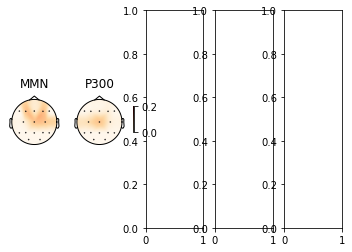

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [22]:
fig, ax = plt.subplots(1, 5)
ax = ax.flatten()
    
for i in range(2):
    c = column[i]
    #读取频段
    a = data[data.columns[i]]
    #将数据转换成array
    b = np.asarray(np.mat(a).T)
    #创建info对象
    info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')
    #创建evokeds对象                       
    evoked = mne.EvokedArray(b, info)
    #去除未分析的电极
    names = ["F3","F4","F7","F8","Fz","C3","Cz","C4","P3","P4","Pz","P7","P8","O1","O2"]
    #names = ["F3","F4","F7","F8","Fz","FC5","FC2","FC1","FC6","C3","C4","Cz"]
    evoked.info['bads'].extend([ch for ch in biosemi_montage.ch_names if ch not in names])
    evoked.drop_channels(evoked.info['bads'])
    #evokeds设置通道
    evoked.set_montage(biosemi_montage)

    #fig = plt.plot()
    plt.figure(figsize=(2,2))
    im,cn = mne.viz.plot_topomap(evoked.data[:, 0], evoked.info,show=False
                 , contours=0,cmap = 'OrRd',vmin=0, vmax=0.2, axes=ax[i])
    ax[i].set_title(c)
#fraction调节colorbar的大小
fig.colorbar(im, ax=[ax[0], ax[1]], fraction=0.01, pad=0.05)
fig.savefig('TASK_important_feature_to_DS_topograph.png'.format(c), format='png', quality=95, dpi=800,bbox_inches='tight')
#plt.savefig('pig.png', bbox_inches='tight')
plt.show
    #显示color bar
   # plt.colorbar(im)
   # plt.savefig('column[i].png', quality=95, dpi=800)
   # plt.savefig('{}(close).png'.format(c), format='png', quality=95, dpi=800)